Data Set: Education_Enrollment

The requirement is to load the Education_Enrollment.csv file which the contains the Enrollement ratio in primary, secondary and Teritiary level in different countries. Data set is obtained from http://data.un.org/
Our aim is to wrangle the data and make it tidy

In [13]:
library(tidyverse)
library(tidyr)


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v dplyr   0.8.3
v tibble  2.1.3     v stringr 1.4.0
v purrr   0.3.2     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [18]:
library(readr)

library(visdat) # To visualize data

In [22]:
#to read the csv file Education_Enrollment and skipping the first line.
Edu_enroll <- read_csv(file = "Education_Enrollment.csv", skip = 1)
Edu_enroll

Warning message:
"Missing column names filled in: 'X2' [2]"Parsed with column specification:
cols(
  `Region/Country/Area` = col_double(),
  X2 = col_character(),
  Year = col_double(),
  Series = col_character(),
  Value = col_number(),
  Footnotes = col_character(),
  Source = col_character()
)


Region/Country/Area,X2,Year,Series,Value,Footnotes,Source
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,"Total, all countries or areas",2005,Students enrolled in primary education (thousands),678991.6100,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.9360,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.9214,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Students enrolled in secondary education (thousands),509245.7600,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7318,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (female),62.0691,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Students enrolled in tertiary education (thousands),139950.8800,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Tertiary (male),23.7177,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."
1,"Total, all countries or areas",2005,Gross enrollment ratio - Tertiary (female),24.8400,NA,"United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019."


In [14]:
# to select only columns from Region/Country/Area

data <- Edu_enroll %>%
  select("Region/Country/Area" : "Value") # To select column

In [15]:
# To rename the columns
data <- data %>%
  rename(
    'Region code' = 'Region/Country/Area',
    'Country' = 'X2'
    )

In [16]:
data <- spread(data, Series, Value) # To spread a column


In [17]:
# To assign "0" for missing data to specific columns
data[c("Gross enrollement ratio - Primary (male)","Gross enrollment ratio - Primary (female)","Gross enrollment ratio - Secondary (female)","Gross enrollment ratio - Secondary (male)","Gross enrollment ratio - Tertiary (female)","Gross enrollment ratio - Tertiary (male)","Students enrolled in primary education (thousands)","Students enrolled in secondary education (thousands)","Students enrolled in tertiary education (thousands)")][is.na(data[c("Gross enrollement ratio - Primary (male)","Gross enrollment ratio - Primary (female)","Gross enrollment ratio - Secondary (female)","Gross enrollment ratio - Secondary (male)","Gross enrollment ratio - Tertiary (female)","Gross enrollment ratio - Tertiary (male)","Students enrolled in primary education (thousands)","Students enrolled in secondary education (thousands)","Students enrolled in tertiary education (thousands)")])] <- 0

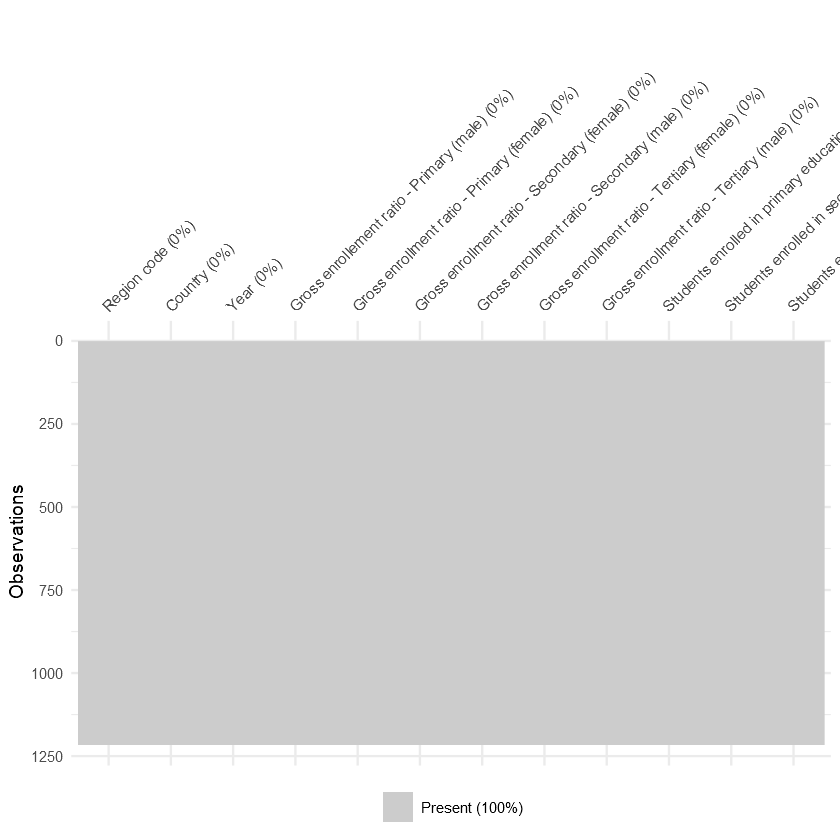

In [19]:
data %>% vis_miss(cluster = TRUE) # to see clustered missing values


In [23]:
data
write_csv(data, path = "Education_enrollment_Wrangled.csv") # To save CSV

Region code,Country,Year,Gross enrollement ratio - Primary (male),Gross enrollment ratio - Primary (female),Gross enrollment ratio - Secondary (female),Gross enrollment ratio - Secondary (male),Gross enrollment ratio - Tertiary (female),Gross enrollment ratio - Tertiary (male),Students enrolled in primary education (thousands),Students enrolled in secondary education (thousands),Students enrolled in tertiary education (thousands)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Total, all countries or areas",2005,104.9360,99.9214,62.0691,65.7318,24.8400,23.7177,678991.610,509245.760,139950.880
1,"Total, all countries or areas",2010,105.8406,102.9678,69.8178,72.3451,30.4946,28.3930,697048.830,546102.430,182209.180
1,"Total, all countries or areas",2014,103.1513,102.8368,75.8210,76.8073,37.5289,33.7063,715016.660,580925.090,212931.480
1,"Total, all countries or areas",2015,102.7414,102.6242,75.9324,76.9851,38.7492,34.7216,720228.450,583315.560,217458.980
1,"Total, all countries or areas",2017,103.7417,104.4958,76.1996,76.9813,40.1622,35.7433,746284.920,590725.240,220704.240
4,Afghanistan,2004,149.6565,65.0020,6.1421,29.4170,0.5213,1.8601,4430.140,594.306,27.648
4,Afghanistan,2005,126.9444,74.5307,9.3116,28.6331,0.0000,0.0000,4318.820,651.453,0.000
4,Afghanistan,2009,118.4504,78.7441,29.3865,60.9922,1.4252,6.0536,4945.630,1716.190,95.185
4,Afghanistan,2010,120.5552,82.7089,34.2960,68.6471,0.0000,0.0000,5279.330,2044.160,0.000
